# This is a data exploration script using the March 17, 2015 storm as a use case

### TODO


- Use this script to produce a Python library of SSJ, SSUSI, and SSIES tools
    - SSJ status: 
        - Have the March 17, 2015 data (from Liam)
        - Wrote a new library that currently reads in the data and am developing plotting routines (stopped in developing the NH and SH total electron energy flux polar plots)
        - Need to develop the spectrogram plotting capability
    - SSUSI status:
        - Have the March 17, 2015 data (from SPDF)
        - None
    - SSIES status:
        - Do NOT have the March 17, 2015 data yet
        - None
- Include data availability dashboard
- Figure out a loose way to identify phenomena
- Identify an ion outflow data source
- Include one THEMIS ASI image plotted on a polar plot with DMSP data




- Use this as a 'story' of what Helio-KNOW is/will be. Components it must make clear:
    - Links to existing tools
    - Makes use of a schema
    - Somehow graph based
    - Pulls in individuals, text, other data that are complementary to observational data
    - Is phenomena-based
    
- Resources
    - [Olga's FOM talk ](https://drive.google.com/file/d/1ux5Ozc8QBoSY5bzP5o-ZnOFf1Sp-zF7H/view?usp=sharing)(lays out the story of MI coupling) "Estimation of energy budget of the driven ionosphere-thermosphere system"
    
    

### Dependencies


In [20]:
# General
import datetime
import os

# Data structures
import h5py   
import numpy as np
import pandas as pd

# Plotting
from matplotlib.gridspec import GridSpec


### Text data

NLP analyses go here to discover about the event

Search terms: _eventname_, polar, auroral, magnetosphere-ionosphere, coupling, geomagnetic storm

How do we understand what has been done? 
- Published literature (ADS)
- Conference presentations (ADS; figshare; essoar; researchgate?)
- Connecting to other individuals and groups (who is working on this?) - this notebook will only at a high/visionary level consider this (requires a social graph)


### DMSP Data

#### SSJ

In [11]:
# Import the SSJ plotting utilities
%run DMSP_SSJ_utils.ipynb

working on file = dmsp-f17_ssj_precipitating-electrons-ions_20150317_v1.1.3.cdf
Variables in the file: 
variable name = Epoch
variable name = SC_ECI
variable name = SC_ECI_LABEL
variable name = SC_GEOCENTRIC_LAT
variable name = SC_GEOCENTRIC_LON
variable name = SC_GEOCENTRIC_R
variable name = SC_AACGM_LAT
variable name = SC_AACGM_LON
variable name = SC_AACGM_LTIME
variable name = CHANNEL_ENERGIES
variable name = ELE_COUNTS_OBS
variable name = ELE_COUNTS_BKG
variable name = ELE_GEOMETRIC
variable name = ELE_DIFF_ENERGY_FLUX
variable name = ELE_DIFF_ENERGY_FLUX_STD
variable name = ELE_TOTAL_ENERGY_FLUX
variable name = ELE_TOTAL_ENERGY_FLUX_STD
variable name = ELE_AVG_ENERGY
variable name = ELE_AVG_ENERGY_STD
variable name = ION_COUNTS_OBS
variable name = ION_COUNTS_BKG
variable name = ION_GEOMETRIC
variable name = ION_DIFF_ENERGY_FLUX
variable name = ION_DIFF_ENERGY_FLUX_STD
variable name = ION_TOTAL_ENERGY_FLUX
variable name = ION_TOTAL_ENERGY_FLUX_STD
variable name = ION_AVG_ENERGY
var

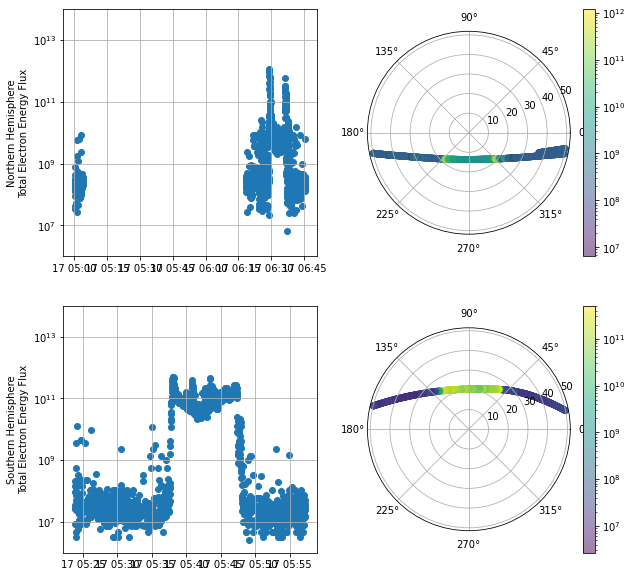

In [28]:
filedirectory = '/Users/ryanmcgranaghan/Documents/DMSPdata/data/Mar17_2015_event/'
ssj_filename = 'dmsp-f17_ssj_precipitating-electrons-ions_20150317_v1.1.3.cdf'

df = dmsp_ssj_cdf_to_dataframe(filedirectory,ssj_filename)

dt_range = [datetime.datetime(2015,3,17,5,0),
            datetime.datetime(2015,3,17,7,0)]
plotting_ssj_time_range(df,dt_range)


# # March 17, 2013 event for checking
# filedirectory = '/Users/ryanmcgranaghan/Documents/DMSPdata/data/'
# ssj_filename = ['dmsp-f16_ssj_precipitating-electrons-ions_20130317_v1.1.2.cdf']
# df = dmsp_ssj_cdf_to_dataframe(filedirectory,filenames[0])

# dt_range = [datetime.datetime(2013,3,17,12),
#             datetime.datetime(2013,3,17,13)]
# plotting_ssj_time_range(df,dt_range)

#### SSUSI

In [ ]:
ssusi_filename = os.path.join('/Users/ryanmcgranaghan/Documents/DMSP_SSUSIdata','')

#### SSIES

In [ ]:
ssies_filename = os.path.join('/Users/ryanmcgranaghan/Documents/DMSP_SSIESdata','')

### Poynting Flux

Reference: 
Billett, D. D., Perry, G. W., Clausen, L. B. N., Archer, W. E., McWilliams, K. A., Haaland, S., et al. (2021). The relationship between large scale thermospheric density enhancements and the spatial distribution of Poynting flux. Journal of Geophysical Research: Space Physics, 126, e2021JA029205. https://doi.org/10.1029/2021JA029205 


Description of the data from Danielle Billett: 

I’ve included quality flags in the file with 1 being good (more than 200 SuperDARN data points), 2 being fair (between 100 and 200) and 3 being poor (less than 100).

The Poynting Flux array is 3D [n_lats x n_lon x n_times]. I’ve also included the grid information, which is equal area upwards of 50 degrees AACGM latitude, so “n_lon” decreases with increasing latitude. The grid is fixed in magnetic local time, not longitude, which are given in degrees from magnetic midnight. Values are given for the high/low values of the latitude/MLT. There is an additional variable which holds the magnetic local time shift values to convert the MLT’s to AACGM longitudes for each tilmestep (just add the number to get longitude, if you need them).

Time info is also there with start and end times for each tilmestep, along with Julian times. IMF data is in GSM coordinates and taken from OMNI.

In [36]:
# pf_filename = '/Users/ryanmcgranaghan/Documents/PoyntingFlux_data/pf_st_patricks_day_2015/20150317_sd_amp_pf.h5'
pf_filename = '/Users/ryanmcgranaghan/Documents/PoyntingFlux_data/hdf5_inertial_north/20100101_sd_amp_pf.h5'

In [37]:
with h5py.File(pf_filename, "r") as f:
    # List all groups
    print('Keys = {}'.format(f.keys()))
    keys = list(f.keys())[0]

    # Get the groups
    groups = f[keys]
    print('Groups = {}'.format(groups))
    
    # Get the grid
    grd_mlat_low = np.array(f.get('Grid/mlat_low'))
    grd_mlat_hgh = np.array(f.get('Grid/mlat_hgh'))
    grd_mlt_low = np.array(f.get('Grid/mlt_low'))
    grd_mlt_hgh = np.array(f.get('Grid/mlt_hgh'))
    
    # Get the data
    for g in f.get('Data').keys():
        print('...reading {} data'.format(g))
    pf = np.array(f.get('/Data/poynting_flux'))
    bx = np.array(f.get('/Data/bx_gsm'))
    by = np.array(f.get('/Data/by_gsm'))
    bz = np.array(f.get('/Data/bz_gsm'))
    qf = np.array(f.get('/Data/sd_qual_flag'))
    
    # Get the times
    yr_e = np.array(f.get('Time/et_year'))
    yr_s = np.array(f.get('Time/st_year'))
    mo_e = np.array(f.get('Time/et_mo'))
    mo_s = np.array(f.get('Time/st_mo'))
    dy_e = np.array(f.get('Time/et_dy'))
    dy_s = np.array(f.get('Time/st_dy'))
    hr_e = np.array(f.get('Time/et_hr'))
    hr_s = np.array(f.get('Time/st_hr'))
    mt_e = np.array(f.get('Time/et_mt'))
    mt_s = np.array(f.get('Time/st_mt'))



Keys = <KeysViewHDF5 ['Data', 'Grid', 'Time']>
Groups = <HDF5 group "/Data" (5 members)>
...reading bx_gsm data
...reading by_gsm data
...reading bz_gsm data
...reading poynting_flux data
...reading sd_qual_flag data


In [38]:
dt_s = [datetime.datetime(yr_s[i],mo_s[i],dy_s[i],hr_s[i],mt_s[i]) for i in range(len(mt_s))]
dt_e = [datetime.datetime(yr_e[i],mo_e[i],dy_e[i],hr_e[i],mt_e[i]) for i in range(len(mt_e))]




In [198]:
np.shape(grd_mlat_hgh)
chc = np.tile(grd_mlat_hgh,(113,1))
np.shape(chc)

(113, 20)

In [68]:
grd_mlt_hgh[:,0]
# chc[:,2]

array([  3.1858406,   6.371681 ,   9.557522 ,  12.743362 ,  15.929204 ,
        19.115044 ,  22.300884 ,  25.486725 ,  28.672565 ,  31.858408 ,
        35.044247 ,  38.230087 ,  41.415928 ,  44.60177  ,  47.78761  ,
        50.97345  ,  54.15929  ,  57.34513  ,  60.530975 ,  63.716816 ,
        66.90266  ,  70.08849  ,  73.27434  ,  76.460175 ,  79.64602  ,
        82.831856 ,  86.0177   ,  89.20354  ,  92.38938  ,  95.57522  ,
        98.76106  , 101.9469   , 105.132744 , 108.31858  , 111.504425 ,
       114.69026  , 117.87611  , 121.06195  , 124.24779  , 127.43363  ,
       130.61948  , 133.80531  , 136.99115  , 140.17699  , 143.36284  ,
       146.54868  , 149.73451  , 152.92035  , 156.1062   , 159.29204  ,
       162.47787  , 165.66371  , 168.84956  , 172.0354   , 175.22124  ,
       178.40707  , 181.59293  , 184.77876  , 187.9646   , 191.15044  ,
       194.33629  , 197.52213  , 200.70796  , 203.8938   , 207.07965  ,
       210.26549  , 213.45132  , 216.63716  , 219.82301  , 223.0

In [41]:
np.multiply(grd_mlt_hgh[0,:],np.pi/180.)


array([0.05560341, 0.05817764, 0.0610018 , 0.06411413, 0.06756113,
       0.07222052, 0.07662421, 0.08267349, 0.08975979, 0.09666439,
       0.10649467, 0.11855067, 0.1336848 , 0.15707964, 0.18479957,
       0.22439946, 0.28559932, 0.3926991 , 0.6981317 , 2.0943952 ],
      dtype=float32)

<ipython-input-207-b8677fe21733>:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ctf = ax3.pcolormesh(np.multiply(grd_mlt_low,np.pi/180.),


NOTE: the bottom left of each grid point is in the correct location (referring to the pole), but the other ones are not


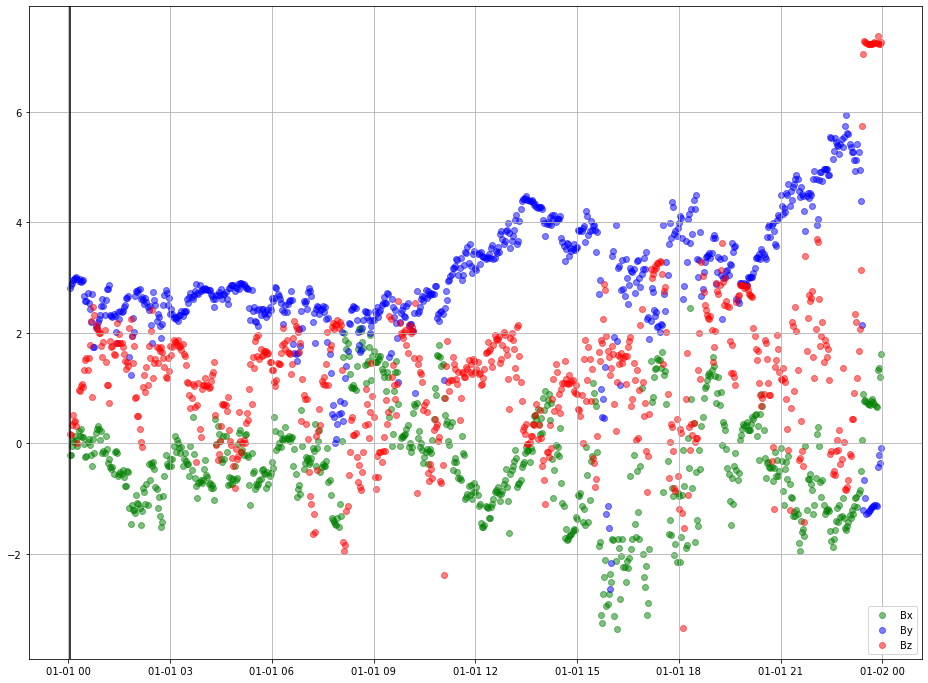

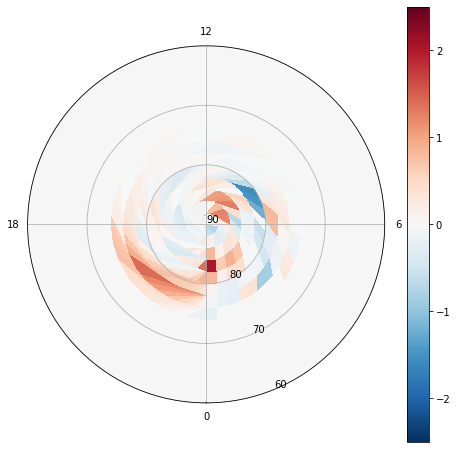

In [207]:

idx = 0

fig = plt.figure(figsize=(16,12))
plt.scatter(dt_s,bx,alpha=0.5,c='g',label='Bx')
plt.scatter(dt_s,by,alpha=0.5,c='b',label='By')
plt.scatter(dt_s,bz,alpha=0.5,c='r',label='Bz')
plt.axvline(dt_s[idx],c='k')
plt.legend()
plt.grid(True)


#Polar plots here    
fig = plt.figure(figsize=(8,8))
gs = GridSpec(1,1, figure=fig)
ax3 = fig.add_subplot(gs[0, 0],polar=True)
# ctf = ax3.pcolormesh(np.multiply(grd_mlt_low,np.pi/180.),
#                      90-chc,
#                      pf[idx],
# #                      vmin=-1.0,
# #                      vmax=1.0, 
#                      cmap='RdBu_r',)
# #                      rasterized=True)
ctf = ax3.pcolormesh(np.multiply(grd_mlt_low,np.pi/180.),
                     90-chc,
                     pf[idx],
                     vmin=-2.5,
                     vmax=2.5, 
                     cmap='RdBu_r',)
#                      rasterized=True)
fig.colorbar(ctf, ax=ax3)


# define your axis limits
ax3.set_ylim([0,30])

# Set the radius labels
ax3.set_yticks(np.arange(0,40,10))  # less radial ticks
ax3.set_yticklabels(90 - np.arange(0,40,10))  # less radial ticks

# Set the circumference labels
ax3.set_xticks(np.linspace(0, 2*np.pi, 4, endpoint=False))
ax3.set_xticklabels(('0','6','12','18'))      
# Make the labels go clockwise
# ax.set_theta_direction(-1)

ax3.grid(True)
ax3.set_theta_zero_location("S")

print("NOTE: the bottom left of each grid point is in the correct location (referring to the pole), but the other ones are not")


In [71]:
print('MLAT: {} to {}'.format(grd_mlat_low[-1],grd_mlat_hgh[-1]))
print('MLT: {} to {}'.format(grd_mlt_low[-1,2],grd_mlt_hgh[-1,2]))


MLAT: 88.0 to 90.0
MLT: 0.0 to 0.0


In [77]:
for la in range(len(grd_mlat_low)):
#     print('MLAT: {} to {}'.format(grd_mlat_low[la],grd_mlat_hgh[la]))
    for lt in range(len(grd_mlt_low[:,la])):
#         print('    MLT: {} to {}'.format(grd_mlt_low[lt,la],grd_mlt_hgh[lt,la]))
        print('Grid point: \n  [({},{})]  [{},{}]\n  [({},{})]  [{},{}]'.format(grd_mlat_hgh[la],
                                                                                grd_mlt_low[lt,la],
                                                                                grd_mlat_hgh[la],
                                                                                grd_mlt_hgh[lt,la],
                                                                                grd_mlat_low[la],
                                                                                grd_mlt_low[lt,la],
                                                                                grd_mlat_low[la],
                                                                                grd_mlt_hgh[lt,la]))

        


Grid point: 
  [(52.0,0.0)]  [52.0,3.185840606689453]
  [(50.0,0.0)]  [50.0,3.185840606689453]
Grid point: 
  [(52.0,3.185840606689453)]  [52.0,6.371681213378906]
  [(50.0,3.185840606689453)]  [50.0,6.371681213378906]
Grid point: 
  [(52.0,6.371681213378906)]  [52.0,9.55752182006836]
  [(50.0,6.371681213378906)]  [50.0,9.55752182006836]
Grid point: 
  [(52.0,9.55752182006836)]  [52.0,12.743362426757812]
  [(50.0,9.55752182006836)]  [50.0,12.743362426757812]
Grid point: 
  [(52.0,12.743362426757812)]  [52.0,15.929203987121582]
  [(50.0,12.743362426757812)]  [50.0,15.929203987121582]
Grid point: 
  [(52.0,15.929203987121582)]  [52.0,19.11504364013672]
  [(50.0,15.929203987121582)]  [50.0,19.11504364013672]
Grid point: 
  [(52.0,19.11504364013672)]  [52.0,22.300884246826172]
  [(50.0,19.11504364013672)]  [50.0,22.300884246826172]
Grid point: 
  [(52.0,22.300884246826172)]  [52.0,25.486724853515625]
  [(50.0,22.300884246826172)]  [50.0,25.486724853515625]
Grid point: 
  [(52.0,25.486724853

Grid point: 
  [(86.0,0.0)]  [86.0,0.0]
  [(84.0,0.0)]  [84.0,0.0]
Grid point: 
  [(86.0,0.0)]  [86.0,0.0]
  [(84.0,0.0)]  [84.0,0.0]
Grid point: 
  [(86.0,0.0)]  [86.0,0.0]
  [(84.0,0.0)]  [84.0,0.0]
Grid point: 
  [(86.0,0.0)]  [86.0,0.0]
  [(84.0,0.0)]  [84.0,0.0]
Grid point: 
  [(86.0,0.0)]  [86.0,0.0]
  [(84.0,0.0)]  [84.0,0.0]
Grid point: 
  [(86.0,0.0)]  [86.0,0.0]
  [(84.0,0.0)]  [84.0,0.0]
Grid point: 
  [(86.0,0.0)]  [86.0,0.0]
  [(84.0,0.0)]  [84.0,0.0]
Grid point: 
  [(86.0,0.0)]  [86.0,0.0]
  [(84.0,0.0)]  [84.0,0.0]
Grid point: 
  [(86.0,0.0)]  [86.0,0.0]
  [(84.0,0.0)]  [84.0,0.0]
Grid point: 
  [(86.0,0.0)]  [86.0,0.0]
  [(84.0,0.0)]  [84.0,0.0]
Grid point: 
  [(86.0,0.0)]  [86.0,0.0]
  [(84.0,0.0)]  [84.0,0.0]
Grid point: 
  [(86.0,0.0)]  [86.0,0.0]
  [(84.0,0.0)]  [84.0,0.0]
Grid point: 
  [(86.0,0.0)]  [86.0,0.0]
  [(84.0,0.0)]  [84.0,0.0]
Grid point: 
  [(86.0,0.0)]  [86.0,0.0]
  [(84.0,0.0)]  [84.0,0.0]
Grid point: 
  [(86.0,0.0)]  [86.0,0.0]
  [(84.0,0.0)]  [84.0,

In [91]:
la = 0
lt = 0
chc = np.array((grd_mlat_low[la],grd_mlt_low[lt,la]),
               (grd_mlat_low[la],grd_mlt_hgh[lt,la],)
                                                                                grd_mlat_hgh[la],
                                                                                grd_mlt_low[lt,la],
                                                                                grd_mlat_hgh[la],
                                                                                grd_mlt_hgh[lt,la]))
print(chc)

[50.         0.        50.         3.1858406 52.         0.
 52.         3.1858406]


[(50.0, 0.0), (52.0, 0.0), (52.0, 0.055603407), (50.0, 0.055603407)]
[(50.0, 0.055603407), (52.0, 0.055603407), (52.0, 0.111206815), (50.0, 0.111206815)]
[(50.0, 0.111206815), (52.0, 0.111206815), (52.0, 0.16681023), (50.0, 0.16681023)]
[(50.0, 0.16681023), (52.0, 0.16681023), (52.0, 0.22241363), (50.0, 0.22241363)]
[(50.0, 0.22241363), (52.0, 0.22241363), (52.0, 0.27801704), (50.0, 0.27801704)]
[(50.0, 0.27801704), (52.0, 0.27801704), (52.0, 0.33362046), (50.0, 0.33362046)]
[(50.0, 0.33362046), (52.0, 0.33362046), (52.0, 0.38922384), (50.0, 0.38922384)]
[(50.0, 0.38922384), (52.0, 0.38922384), (52.0, 0.44482726), (50.0, 0.44482726)]
[(50.0, 0.44482726), (52.0, 0.44482726), (52.0, 0.50043064), (50.0, 0.50043064)]
[(50.0, 0.50043064), (52.0, 0.50043064), (52.0, 0.5560341), (50.0, 0.5560341)]
[(50.0, 0.5560341), (52.0, 0.5560341), (52.0, 0.6116375), (50.0, 0.6116375)]
[(50.0, 0.6116375), (52.0, 0.6116375), (52.0, 0.6672409), (50.0, 0.6672409)]
[(50.0, 0.6672409), (52.0, 0.6672409), (52.0

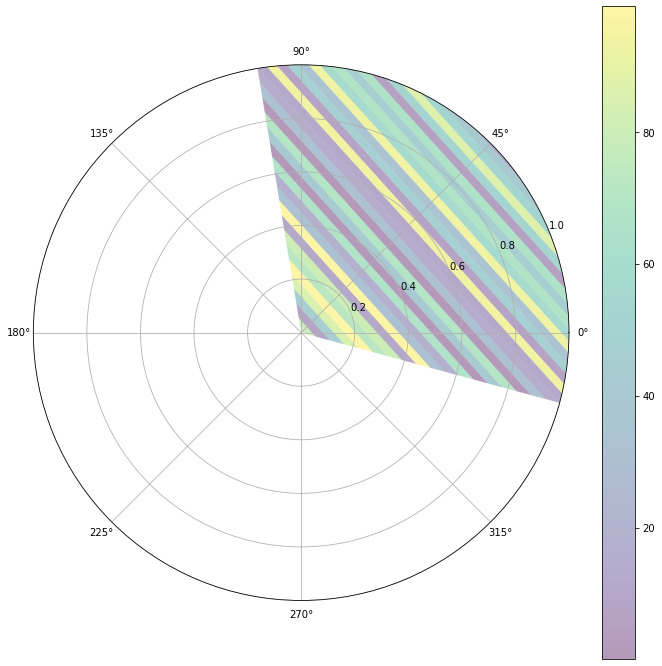

In [170]:
fig = plt.figure(figsize=(12,12))
polar = fig.add_subplot(111,projection='polar')
# chc = np.array((90-grd_mlat_hgh[la],
#                 np.multiply(grd_mlt_low[lt,la],np.pi/180.) - np.pi/2.,
#                 90-grd_mlat_hgh[la],
#                 np.multiply(grd_mlt_hgh[lt,la],np.pi/180.) - np.pi/2.,
#                 90-grd_mlat_low[la],
#                 np.multiply(grd_mlt_low[lt,la],np.pi/180.) - np.pi/2.,
#                 90-grd_mlat_low[la],
#                 np.multiply(grd_mlt_hgh[lt,la],np.pi/180.) - np.pi/2.))
# chc = [(90-grd_mlat_hgh[la],np.multiply(grd_mlt_low[lt,la],np.pi/180.) - np.pi/2.,),
#        (90-grd_mlat_hgh[la],np.multiply(grd_mlt_hgh[lt,la],np.pi/180.) - np.pi/2.,),]
#                 (90-grd_mlat_low[la],
#                 np.multiply(grd_mlt_low[lt,la],np.pi/180.) - np.pi/2.,),
#                 (90-grd_mlat_low[la],
#                 np.multiply(grd_mlt_hgh[lt,la],np.pi/180.) - np.pi/2.))
patches = []
for la in range(0,1):#len(grd_mlat_low)):
#     print('MLAT: {} to {}'.format(grd_mlat_low[la],grd_mlat_hgh[la]))
    for lt in range(len(grd_mlt_low[:,la])):
#         chc = [(np.multiply(grd_mlt_hgh[lt,la],np.pi/180.) - np.pi/2.,90-grd_mlat_hgh[la]),
#                            (np.multiply(grd_mlt_hgh[lt,la],np.pi/180.) - np.pi/2.,90-grd_mlat_low[la]),
#                            (np.multiply(grd_mlt_low[lt,la],np.pi/180.) - np.pi/2.,90-grd_mlat_low[la]),
#                            (np.multiply(grd_mlt_low[lt,la],np.pi/180.) - np.pi/2.,90-grd_mlat_hgh[la]),
#                           ]
#         chc = [(np.deg2rad(grd_mlt_hgh[lt,la]*15.),90-grd_mlat_hgh[la]),
#                (np.deg2rad(grd_mlt_hgh[lt,la]*15.),90-grd_mlat_low[la]),
#                (np.deg2rad(grd_mlt_low[lt,la]*15.),90-grd_mlat_low[la]),
#                (np.deg2rad(grd_mlt_low[lt,la]*15.),90-grd_mlat_hgh[la]),
#               ]
#         chc = [(np.deg2rad(grd_mlt_low[lt,la]),grd_mlat_low[la]),
#                (np.deg2rad(grd_mlt_low[lt,la]),grd_mlat_hgh[la]),
#                (np.deg2rad(grd_mlt_hgh[lt,la]),grd_mlat_hgh[la]),
#                (np.deg2rad(grd_mlt_hgh[lt,la]),grd_mlat_low[la]),
#               ]
        chc = [(grd_mlat_low[la],np.deg2rad(grd_mlt_low[lt,la])),
               (grd_mlat_hgh[la],np.deg2rad(grd_mlt_low[lt,la]),),
               (grd_mlat_hgh[la],np.deg2rad(grd_mlt_hgh[lt,la]),),
               (grd_mlat_low[la],np.deg2rad(grd_mlt_hgh[lt,la]),),
              ]
        print(chc)
        polygon = Polygon(chc,fill=True)
        patches.append(polygon)
# polar.add_line(polygon)
# polar.autoscale()
colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(colors)
polar.add_collection(p)
fig.colorbar(p, ax=polar)

plt.show()


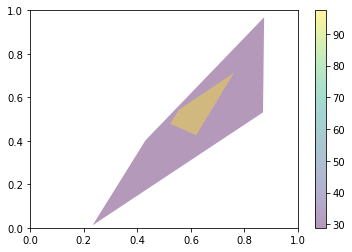

In [165]:

import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(8)


fig, ax = plt.subplots()
ax.projection='polar'

resolution = 50  # the number of vertices
N = 4
# x = np.random.rand(N)
# y = np.random.rand(N)
# radii = 0.1*np.random.rand(N)
patches = []
# for x1, y1, r in zip(x, y, radii):
#     circle = Circle((x1, y1), r)
#     patches.append(circle)

# x = np.random.rand(N)
# y = np.random.rand(N)
# radii = 0.1*np.random.rand(N)
# theta1 = 360.0*np.random.rand(N)
# theta2 = 360.0*np.random.rand(N)
# for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
#     wedge = Wedge((x1, y1), r, t1, t2)
#     patches.append(wedge)

# # Some limiting conditions on Wedge
# patches += [
#     Wedge((.3, .7), .1, 0, 360),             # Full circle
#     Wedge((.7, .8), .2, 0, 360, width=0.05),  # Full ring
#     Wedge((.8, .3), .2, 0, 45),              # Full sector
#     Wedge((.8, .3), .2, 45, 90, width=0.10),  # Ring sector
# ]

for i in [0,1]:
    polygon = Polygon(np.random.rand(N, 2), True)
    patches.append(polygon)

colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(colors)
ax.add_collection(p)
fig.colorbar(p, ax=ax)

plt.show()



In [176]:
grd_mlt_low[:,0]

array([  0.       ,   3.1858406,   6.371681 ,   9.557522 ,  12.743362 ,
        15.929204 ,  19.115044 ,  22.300884 ,  25.486725 ,  28.672565 ,
        31.858408 ,  35.044247 ,  38.230087 ,  41.415928 ,  44.60177  ,
        47.78761  ,  50.97345  ,  54.15929  ,  57.34513  ,  60.530975 ,
        63.716816 ,  66.90266  ,  70.08849  ,  73.27434  ,  76.460175 ,
        79.64602  ,  82.831856 ,  86.0177   ,  89.20354  ,  92.38938  ,
        95.57522  ,  98.76106  , 101.9469   , 105.132744 , 108.31858  ,
       111.504425 , 114.69026  , 117.87611  , 121.06195  , 124.24779  ,
       127.43363  , 130.61948  , 133.80531  , 136.99115  , 140.17699  ,
       143.36284  , 146.54868  , 149.73451  , 152.92035  , 156.1062   ,
       159.29204  , 162.47787  , 165.66371  , 168.84956  , 172.0354   ,
       175.22124  , 178.40707  , 181.59293  , 184.77876  , 187.9646   ,
       191.15044  , 194.33629  , 197.52213  , 200.70796  , 203.8938   ,
       207.07965  , 210.26549  , 213.45132  , 216.63716  , 219.8

52.0 50.0
3.1858406 0.0
39.0 0.0
2.0
0.0 3.1858406


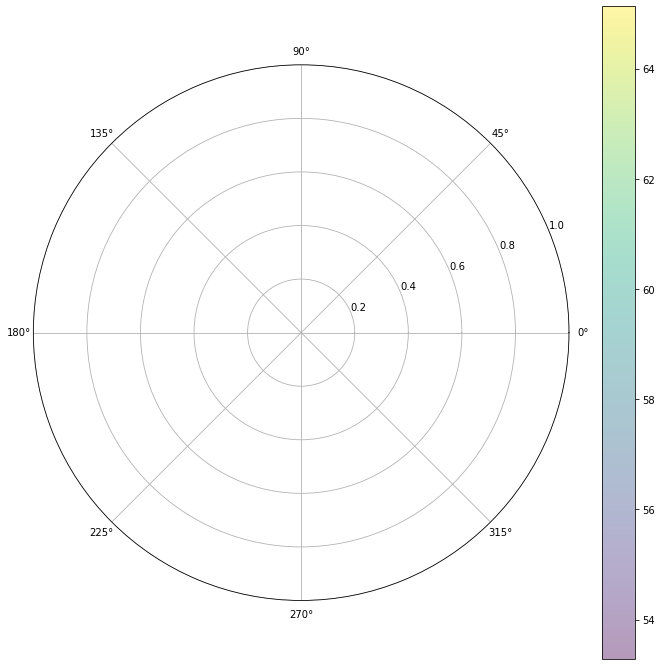

In [193]:
fig = plt.figure(figsize=(12,12))
polar = fig.add_subplot(111,projection='polar')

patches = []

w = grd_mlat_hgh[0] - grd_mlat_low[0]
t1 = grd_mlt_low[0,0]
t2 = grd_mlt_hgh[0,0]
x1 = ( 90. - np.mean( (grd_mlat_hgh[0],grd_mlat_low[0]) ) ) * np.cos(t1)
y1 = ( 90. - np.mean( (grd_mlat_hgh[0],grd_mlat_low[0]) ) ) * np.sin(t1)
# y1 = 90 - np.mean( (grd_mlt_hgh[0,:],grd_mlt_low[0,:]) )

print(grd_mlat_hgh[0],grd_mlat_low[0])
print(grd_mlt_hgh[0,0],grd_mlt_low[0,0])
print(x1,y1)
print(w)
print(t1,t2)

wedge = Wedge((x1, y1), w, t1, t2)
wedge = Wedge((0,0), 2, 0,np.pi)
r_min = 0.3, r_max = 0.5, t_min = np.pi/4, t_max = 3*np.pi/4
# wedge = Wedge(r, t1, t2,width(2))
patches.append(wedge)
colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(colors)
polar.add_collection(p)
fig.colorbar(p, ax=polar)

plt.show()